### OCR EXERCISE ###

In [1]:
# !pip install opencv-python pytesseract pdf2image

  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_x86_64.whl.metadata (19 kB)
  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_x86_64.whl.metadata (62 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_x86_64.whl (57.3 MB)
Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_x86_64.whl (6.6 MB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
Using cached pdf2image-1.17.0-py3-none-any.whl (11 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:╺━━━━━━━━━━━━━━━━━━━ 2/4 [numpy]
      Successfully uninstalled numpy-2.3.2m━━━━━━━━━━━━━━━━━━━ 2/4 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [opencv-python]0m [opencv-python]


In [ ]:
# Cell no. 1 : Import library
import numpy as np
import matplotlib.pyplot as plt

# OCR-related libraries
from PIL import Image  # Pillow for image processing
import cv2  # OpenCV for computer vision and image manipulation
import pytesseract  # Python wrapper for Tesseract OCR engine
from pdf2image import convert_from_path  # Convert PDF pages to images

## OCR (Optical Character Recognition) Overview

OCR is the process of converting images of typed, handwritten, or printed text into machine-readable text. It's useful for digitizing documents, automating data entry, and extracting text from images or PDFs.

### Libraries Used:
- **Pillow (PIL)**: For basic image processing tasks like opening, resizing, and converting image formats.
- **OpenCV (cv2)**: For advanced computer vision operations, such as image filtering, edge detection, and preprocessing to enhance OCR accuracy.
- **pytesseract**: A Python wrapper for Tesseract OCR engine, which performs the actual text extraction from images.
- **pdf2image**: Converts PDF pages into images, allowing OCR to be applied to scanned documents or PDFs.

### Next Steps:
You can now load an image or PDF, preprocess it with OpenCV and Pillow, and extract text using pytesseract.

Processing page 1...


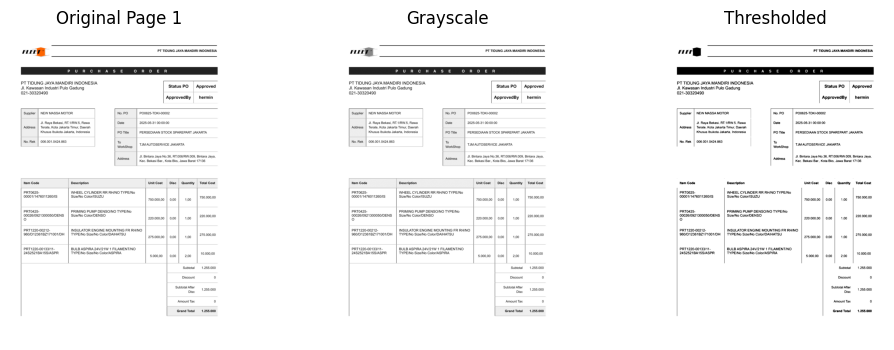

In [16]:
# Cell no. 2 : Load and preprocess the image
# used from same directory file name : PO0625-TDKI-00002.pdf

import os  # For file path handling

# Define the PDF file path (assuming it's in the same directory as the notebook)
pdf_path = "PO0625-TDKI-00002.pdf"

# Check if the file exists
if not os.path.exists(pdf_path):
    print(f"Error: File '{pdf_path}' not found in the current directory.")
else:
    # Convert PDF pages to images (one image per page)
    # This uses pdf2image to handle multi-page PDFs
    images = convert_from_path(pdf_path)

    # Process each page
    for i, image in enumerate(images):
        print(f"Processing page {i+1}...")

        # Convert PIL image to OpenCV format (numpy array)
        # OpenCV works with numpy arrays, so we convert from PIL
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Preprocessing step 1: Convert to grayscale
        # Grayscale reduces color noise and improves OCR accuracy
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

        # Preprocessing step 2: Apply Gaussian blur to reduce noise
        # Blurring helps in smoothing the image before thresholding
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Preprocessing step 3: Apply binary thresholding
        # This converts the image to black and white, making text clearer for OCR
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Optional: Display the original and processed images using matplotlib
        # This helps visualize the preprocessing steps
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title(f"Original Page {i+1}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(gray, cmap='gray')
        plt.title("Grayscale")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(thresh, cmap='gray')
        plt.title("Thresholded")
        plt.axis('off')

        plt.show()

        # At this point, 'thresh' is the preprocessed image ready for OCR
        # You can now use pytesseract.image_to_string(thresh) to extract text

In [6]:
# Cell no. 3 : Perform OCR on the preprocessed image
# This cell performs OCR on the preprocessed images from the PDF and extracts text for data collection.

import os  # For file path handling

# Define the PDF file path (assuming it's in the same directory as the notebook)
pdf_path = "PO0625-TDKI-00002.pdf"

# Check if the file exists
if not os.path.exists(pdf_path):
    print(f"Error: File '{pdf_path}' not found in the current directory.")
else:
    # Convert PDF pages to images (one image per page)
    # This uses pdf2image to handle multi-page PDFs
    images = convert_from_path(pdf_path)

    # Initialize a list to store extracted text from each page
    extracted_texts = []

    # Process each page
    for i, image in enumerate(images):
        print(f"Processing page {i+1} for OCR...")

        # Convert PIL image to OpenCV format (numpy array)
        # OpenCV works with numpy arrays, so we convert from PIL
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        # Preprocessing step 1: Convert to grayscale
        # Grayscale reduces color noise and improves OCR accuracy
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

        # Preprocessing step 2: Apply Gaussian blur to reduce noise
        # Blurring helps in smoothing the image before thresholding
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Preprocessing step 3: Apply binary thresholding
        # This converts the image to black and white, making text clearer for OCR
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Perform OCR on the preprocessed image
        # pytesseract extracts text from the thresholded image
        text = pytesseract.image_to_string(thresh)

        # Store the extracted text
        extracted_texts.append(text)

        # Print the extracted text for this page
        print(f"\n--- Extracted Text from Page {i+1} ---")
        print(text)
        print("-" * 50)

    # Optional: Combine all texts into one string for data collection
    full_text = "\n\n".join(extracted_texts)
    print("\n--- Full Extracted Text from All Pages ---")
    print(full_text)

    # You can now use 'extracted_texts' list or 'full_text' string for further data processing,
    # such as saving to a file, parsing specific data, or analyzing the content.

Processing page 1 for OCR...

--- Extracted Text from Page 1 ---
Fa ag PT TIDUNG JAYA MANDIRI INDONESIA

P U R C H AS CE Oo R OD E R

PT TIDUNG JAYA MANDIRI INDONESIA
Jl. Kawasan Industri Pulo Gadung
021-30320490

Status PO | Approved

ApprovedBy | hermin

Supplier | NEW MASSA MOTOR | No. PO PO0625-TDKI-00002
Jl. Raya Bekasi, RT. 1/RW.5, Rawa Date 2025-05-31 00:00:00
Address | Terate, Kota Jakarta Timur, Daerah
Khusus Ibukota Jakarta, Indonesia PO Title PERSEDIAAN STOCK SPAREPART JAKARTA
No. Rek | 006.001.424.863 | To TJM AUTOSERVICE JAKARTA
WorkShop
Addr Jl. Bintara Jaya No.36, RT.006/RW.009. Bintara Jaya,
ess Kec. Bekasi Bar., Kota Bks, Jawa Barat 17136
Item Code Description Unit Cost Disc Quantity Total Cost
PRT0625- WHEEL CYLINDER RR RH/NO TYPE/No
00001/1476011260/IS Size/No Color/ISUZU 750.000,00
750.000,00 | 0,00 1,00 .
PRT0425- PRIMING PUMP DENSO/NO TYPE/No
00026/0921300050/DENS Size/No Color/DENSO 220.000,00
Oo 220.000,00 | 0.00 1,00
PRT1220-00212- INSULATOR ENGINE MOUNTING FR 

In [10]:
# Cell No. 4 : Post-processing and used Regex or NLP library to make more readle and input to database system
# This cell post-processes the extracted text using improved regex to identify key fields and structures them into a dictionary and DataFrame for database input.

import re  # For regular expressions
import pandas as pd  # For creating DataFrames

# Assuming 'full_text' is available from the previous cell (Cell 3)
# If not, you can rerun Cell 3 or copy the code here

# Use improved regex to extract specific fields based on examples
# Supplier (e.g., "Supplier | NEW MASSA MOTOR | ...") - capture after "|", then split at "|" and take first part
supplier_match = re.search(r'Supplier\s*\|\s*(.+)', full_text, re.IGNORECASE)
if supplier_match:
    supplier_text = supplier_match.group(1)
    supplier = supplier_text.split('|')[0].strip()
else:
    supplier = "Not found"

# No Doc (e.g., "No. PO PO0625-TDKI-00002")
no_doc_match = re.search(r'No\.?\s*PO\s*([A-Z0-9-]+)', full_text, re.IGNORECASE)
no_doc = no_doc_match.group(1) if no_doc_match else "Not found"

# Date (e.g., "Date 2025-05-31 00:00:00")
date_match = re.search(r'Date\s*(\d{4}-\d{2}-\d{2}\s*\d{2}:\d{2}:\d{2})', full_text)
date = date_match.group(1) if date_match else "Not found"

# Status (e.g., "Status PO | Approved")
status_match = re.search(r'Status\s*PO\s*\|\s*(.+)', full_text, re.IGNORECASE)
status = status_match.group(1).strip() if status_match else "Not found"

# Address (e.g., "Jl. Raya Bekasi...")
address_match = re.search(r'(Jl\..+)', full_text)
address = address_match.group(1).strip() if address_match else "Not found"

# To (e.g., "| To TJM AUTOSERVICE JAKARTA")
to_match = re.search(r'\|\s*To\s*(.+)', full_text)
to = to_match.group(1).strip() if to_match else "Not found"

# Items: Refine to find lines with prices (e.g., 750.000,00 | 0,00 1,00)
items = []
item_lines = re.findall(r'(\d+\.\d+,\d+)\s*\|\s*(\d+,\d+)\s*(\d+,\d+)', full_text)
for unit_cost, disc, qty in item_lines:
    # Try to find description before the line
    # This is simplistic; in a real scenario, parse the table structure
    desc = "Item"  # Placeholder
    items.append({'unit_cost': unit_cost, 'discount': disc, 'quantity': qty, 'description': desc})

# If no items found with the pattern, fall back to simple quantity + description
if not items:
    item_lines = re.findall(r'(\d+)\s+(.+)', full_text)
    for qty, desc in item_lines:
        if '|' in desc or ',' in desc:  # Filter to likely item lines
            items.append({'quantity': int(qty), 'description': desc.strip()})

# Create a dictionary with extracted data
extracted_data = {
    'Supplier': supplier,
    'No Doc': no_doc,
    'Date': date,
    'Status': status,
    'Address': address,
    'To': to,
    'items': items
}

# Print the dictionary
print("Extracted Data Dictionary:")
print(extracted_data)

# Convert to DataFrame for easier database input
# Flatten items into rows
df_items = pd.DataFrame(items)
df_main = pd.DataFrame([{'Supplier': supplier, 'No Doc': no_doc, 'Date': date, 'Status': status, 'Address': address, 'To': to}])

# Display the DataFrames
print("\nMain DataFrame:")
print(df_main)
print("\nItems DataFrame:")
print(df_items)

# Optional: Save to CSV for database import
# df_main.to_csv('document_main.csv', index=False)
# df_items.to_csv('document_items.csv', index=False)
# print("\nData saved to CSV files for database input.")

# This structured data can now be inserted into a database system, e.g., using SQL or ORM.

Extracted Data Dictionary:
{'Supplier': 'NEW MASSA MOTOR', 'No Doc': 'PO0625-TDKI-00002', 'Date': '2025-05-31 00:00:00', 'Status': 'Approved', 'Address': 'Jl. Kawasan Industri Pulo Gadung', 'To': 'TJM AUTOSERVICE JAKARTA', 'items': [{'unit_cost': '750.000,00', 'discount': '0,00', 'quantity': '1,00', 'description': 'Item'}]}

Main DataFrame:
          Supplier             No Doc                 Date    Status  \
0  NEW MASSA MOTOR  PO0625-TDKI-00002  2025-05-31 00:00:00  Approved   

                            Address                       To  
0  Jl. Kawasan Industri Pulo Gadung  TJM AUTOSERVICE JAKARTA  

Items DataFrame:
    unit_cost discount quantity description
0  750.000,00     0,00     1,00        Item


In [29]:
# Parse each item
table_items = []
for item_lines in items_raw:
    if not item_lines:
        continue
    # First line: PRT code and description
    first_line = item_lines[0]
    parts = first_line.split(' ', 1)
    item_code = parts[0].strip().rstrip('-')  # Remove trailing -
    description = parts[1] if len(parts) > 1 else ''
    
    # Add continuation lines that contain '/' (description parts)
    for line in item_lines[1:]:
        if '/' in line:
            description += ' ' + line.strip()
    
    # Unit cost from the description
    desc_nums = re.findall(r'(\d+[\.,]\d+[\.,]\d+|\d+[\.,]\d+)', description)
    unit_cost = desc_nums[-1] if desc_nums else ''
    
    # Remove the unit_cost from description
    if unit_cost:
        description = description.replace(unit_cost, '').strip()
    
    # Prices from last line
    last_line = item_lines[-1] if len(item_lines) > 1 else first_line
    last_nums = re.findall(r'(\d+[\.,]\d+[\.,]\d+|\d+[\.,]\d+)', last_line)
    
    total_cost = last_nums[0] if len(last_nums) > 0 else ''
    disc = last_nums[1] if len(last_nums) > 1 else ''
    quantity = last_nums[2] if len(last_nums) > 2 else ''
    
    table_items.append({
        'Item Code': item_code,
        'Description': description,
        'Unit Cost': unit_cost,
        'Disc': disc,
        'Quantity': quantity,
        'Total Cost': total_cost
    })

print(f"Parsed {len(table_items)} items")

if table_items:
    print("First item description:", repr(table_items[0]['Description']))

# Filter out unwanted rows (Subtotal, Disc, Amount Tax)
table_items = [item for item in table_items if 'Subtotal' not in item['Description'] and 'Disc' not in item['Description'] and 'Amount Tax' not in item['Description']]

print(f"After filtering: {len(table_items)} items")

# Split Description by '/' into additional columns
for item in table_items:
    desc_parts = item['Description'].split('/')
    item['Item Name'] = desc_parts[0].strip() if len(desc_parts) > 0 else ''
    item['Type'] = desc_parts[1].strip() if len(desc_parts) > 1 else ''
    item['No Part'] = desc_parts[2].strip() if len(desc_parts) > 2 else ''
    item['Product Code'] = desc_parts[3].strip() if len(desc_parts) > 3 else ''
    item['Size'] = desc_parts[4].strip() if len(desc_parts) > 4 else ''
    item['Color'] = desc_parts[5].strip() if len(desc_parts) > 5 else ''
    item['Brand'] = desc_parts[6].strip() if len(desc_parts) > 6 else ''

# Create DataFrame for the table
df_table = pd.DataFrame(table_items)

# Set pandas to display full column width
pd.set_option('display.max_colwidth', None)

# Display the Table DataFrame
print("Item Table DataFrame:")
print(df_table)

# Optional: Save to CSV
# df_table.to_csv('item_table.csv', index=False)

Parsed 5 items
First item description: 'WHEEL CYLINDER RR RH/NO TYPE/No 00001/1476011260/IS Size/No Color/ISUZU'
After filtering: 5 items
Item Table DataFrame:
          Item Code  \
0           PRT0625   
1           PRT0425   
2     PRT1220-00212   
3  PRT1220-00133/11   
4  PRT1220-00133/11   

                                                                               Description  \
0                  WHEEL CYLINDER RR RH/NO TYPE/No 00001/1476011260/IS Size/No Color/ISUZU   
1                  PRIMING PUMP DENSO/NO TYPE/No 00026/0921300050/DENS Size/No Color/DENSO   
2  INSULATOR ENGINE MOUNTING FR RH/NO 960/D12361BZ171001/DH TYPE/No Size/No Color/DAIHATSU   
3         BULB ASPIRA 24V/21W 1 FILAMENT/NO 24S2521BA15S/ASPR TYPE/No Size/No Color/ASPIRA   
4         BULB ASPIRA 24V/21W 1 FILAMENT/NO 24S2521BA15S/ASPR TYPE/No Size/No Color/ASPIRA   

    Unit Cost  Disc Quantity  Total Cost                        Item Name  \
0  750.000,00  0,00     1,00  750.000,00             WHEEL 

In [33]:
# Cell NO 6: Extract data from a different document using the previous process
# File name: PO0625-TDKI-00022.pdf

import os
import re
import pandas as pd

def process_pdf_to_text(pdf_path):
    """Load, preprocess, and perform OCR on the PDF to get full_text."""
    if not os.path.exists(pdf_path):
        print(f"Error: File '{pdf_path}' not found.")
        return ""
    
    images = convert_from_path(pdf_path)
    extracted_texts = []
    
    for image in images:
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        text = pytesseract.image_to_string(thresh)
        extracted_texts.append(text)
    
    full_text = "\n\n".join(extracted_texts)
    return full_text

def extract_main_fields(full_text):
    """Extract main fields like Supplier, No Doc, etc., and return DataFrames."""
    supplier_match = re.search(r'Supplier\s*\|\s*(.+)', full_text, re.IGNORECASE)
    supplier = supplier_match.group(1).split('|')[0].strip() if supplier_match else "Not found"
    
    no_doc_match = re.search(r'No\.?\s*PO\s*([A-Z0-9-]+)', full_text, re.IGNORECASE)
    no_doc = no_doc_match.group(1) if no_doc_match else "Not found"
    
    date_match = re.search(r'Date\s*(\d{4}-\d{2}-\d{2}\s*\d{2}:\d{2}:\d{2})', full_text)
    date = date_match.group(1) if date_match else "Not found"
    
    status_match = re.search(r'Status\s*PO\s*\|\s*(.+)', full_text, re.IGNORECASE)
    status = status_match.group(1).strip() if status_match else "Not found"
    
    address_match = re.search(r'(Jl\..+)', full_text)
    address = address_match.group(1).strip() if address_match else "Not found"
    
    to_match = re.search(r'\|\s*To\s*(.+)', full_text)
    to = to_match.group(1).strip() if to_match else "Not found"
    
    df_main = pd.DataFrame([{'Supplier': supplier, 'No Doc': no_doc, 'Date': date, 'Status': status, 'Address': address, 'To': to}])
    return df_main

def parse_item_table(full_text):
    """Parse the item table from full_text and return the DataFrame."""
    lines = full_text.split('\n')
    items_raw = []
    current_item = []
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
        if line.startswith('PRT'):
            if current_item:
                items_raw.append(current_item)
            current_item = [line]
        elif current_item and (re.search(r'\d+\.\d+,\d+', line) or '|' in line):
            current_item.append(line)
        elif current_item and re.search(r'(?i)(subtotal|discount|total)', line):
            if current_item:
                items_raw.append(current_item)
            break
    
    if current_item:
        items_raw.append(current_item)
    
    table_items = []
    for item_lines in items_raw:
        if not item_lines:
            continue
        first_line = item_lines[0]
        parts = first_line.split(' ', 1)
        item_code = parts[0].strip().rstrip('-')
        description = parts[1] if len(parts) > 1 else ''
        
        for line in item_lines[1:]:
            if '/' in line:
                description += ' ' + line.strip()
        
        desc_nums = re.findall(r'(\d+[\.,]\d+[\.,]\d+|\d+[\.,]\d+)', description)
        unit_cost = desc_nums[-1] if desc_nums else ''
        if unit_cost:
            description = description.replace(unit_cost, '').strip()
        
        last_line = item_lines[-1] if len(item_lines) > 1 else first_line
        last_nums = re.findall(r'(\d+[\.,]\d+[\.,]\d+|\d+[\.,]\d+)', last_line)
        total_cost = last_nums[0] if len(last_nums) > 0 else ''
        disc = last_nums[1] if len(last_nums) > 1 else ''
        quantity = last_nums[2] if len(last_nums) > 2 else ''
        
        table_items.append({
            'Item Code': item_code,
            'Description': description,
            'Unit Cost': unit_cost,
            'Disc': disc,
            'Quantity': quantity,
            'Total Cost': total_cost
        })
    
    table_items = [item for item in table_items if 'Subtotal' not in item['Description'] and 'Disc' not in item['Description'] and 'Amount Tax' not in item['Description']]
    
    for item in table_items:
        desc_parts = item['Description'].split('/')
        item['Item Name'] = desc_parts[0].strip() if len(desc_parts) > 0 else ''
        item['Type'] = desc_parts[1].strip() if len(desc_parts) > 1 else ''
        item['No Part'] = desc_parts[2].strip() if len(desc_parts) > 2 else ''
        item['Product Code'] = desc_parts[3].strip() if len(desc_parts) > 3 else ''
        item['Size'] = desc_parts[4].strip() if len(desc_parts) > 4 else ''
        item['Color'] = desc_parts[5].strip() if len(desc_parts) > 5 else ''
        item['Brand'] = desc_parts[6].strip() if len(desc_parts) > 6 else ''
    
    df_table = pd.DataFrame(table_items)
    pd.set_option('display.max_colwidth', None)
    return df_table

# Now, process the new document
new_pdf_path = "PO0625-TDKI-00022.pdf"
print(f"Processing new document: {new_pdf_path}")

full_text = process_pdf_to_text(new_pdf_path)
if full_text:
    print("Full text extracted successfully.")
    
    df_main = extract_main_fields(full_text)
    print("Main DataFrame:")
    print(df_main)
    
    df_table = parse_item_table(full_text)
    print("\nItem Table DataFrame:")
    print(df_table)
    
    # Optional: Save to CSV
    # df_main.to_csv('new_document_main.csv', index=False)
    # df_table.to_csv('new_document_items.csv', index=False)
else:
    print("Failed to extract text from the PDF.")

Processing new document: PO0625-TDKI-00022.pdf
Full text extracted successfully.
Main DataFrame:
      Supplier             No Doc                 Date    Status  \
0  BAYAN MOTOR  PO0625-TDKI-00022  2025-05-26 00:00:00  Approved   

                            Address                       To  
0  Jl. Kawasan Industri Pulo Gadung  TJM AUTOSERVICE JAKARTA  

Item Table DataFrame:
       Item Code  \
0  PRT0225-00036   
1        PRT0924   
2        PRT0525   
3        PRT0221   
4        PRT0221   

                                                                  Description  \
0                                          KING PIN CANTER/NO TYPE/No Size/No   
1      TIE ROD END RH LH/NO TYPE/No Size/No 00082/HMTE009010/HKR Color/HEIKER   
2     WHEEL CYLINDER FR RH/NO TYPE/No 00124/BMWFS33/BKN Size/No Color/BIRKENS   
3  AIR CLEANER ME017246/NO TYPE/No 00118/ME017246/MT Size/No Color/MITSUBISHI   
4  AIR CLEANER ME017246/NO TYPE/No 00118/ME017246/MT Size/No Color/MITSUBISHI   

    Unit 